In [144]:
import pandas as pd
import numpy as np
from scipy.stats import levene
from scipy.stats import bartlett
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, anderson, kstest,jarque_bera, normaltest , levene,bartlett


In [145]:
df = pd.read_csv("./datasets/전처리완료/코스닥_train_power.csv", index_col=0)
test = pd.read_csv("./datasets/전처리완료/코스닥_test_power.csv", index_col=0)
# pd.reset_option("display.max.rows", None)
df["업력"] = df["업력"].astype("float")
df["거래소코드"] = df["거래소코드"].astype("object")
df["회계년도"] = df["회계년도"].astype("object")


df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5260 entries, 0 to 5259
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   차입금의존도                 5260 non-null   float64
 1   부채비율                   5260 non-null   float64
 2   순운전자본비율                5260 non-null   float64
 3   총자본정상영업이익률             5260 non-null   float64
 4   자기자본순이익률               5260 non-null   float64
 5   총자본순이익률                5260 non-null   float64
 6   매출액총이익률                5260 non-null   float64
 7   금융비용부담률                5260 non-null   float64
 8   자본금회전률                 5260 non-null   float64
 9   유형자산회전율                5260 non-null   float64
 10  재고자산회전률                5260 non-null   float64
 11  자기자본회전률                5260 non-null   float64
 12  타인자본회전률                5260 non-null   float64
 13  총자본회전률                 5260 non-null   float64
 14  외국인지분율                 5260 non-null   float64
 15  대주주지

In [146]:
df_y = df[["target_1", "target_2", "target_3"]]
df_obj = df.select_dtypes("object")
col_int = df.select_dtypes("float").columns.to_list()

In [147]:
# 정규성 검정을 하나의 함수로
def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])

In [148]:
normal_test("kstest",df[col_int])

(    normal
 0   자본금회전률
 1  타인자본회전률
 2   총자본회전률,
                 notnormal
 0                  차입금의존도
 1                    부채비율
 2                 순운전자본비율
 3              총자본정상영업이익률
 4                자기자본순이익률
 5                 총자본순이익률
 6                 매출액총이익률
 7                 금융비용부담률
 8                 유형자산회전율
 9                 재고자산회전률
 10                자기자본회전률
 11                 외국인지분율
 12                 대주주지분율
 13                유형자산증가율
 14                 매출액증가율
 15                자기자본증가율
 16                 총자본증가율
 17              정상영업이익증가율
 18                누적수익성비율
 19                  이자부담률
 20                 부채상환계수
 21              현금흐름 대 자산
 22             현금흐름 대 매출액
 23                    TMD
 24                 시총/총자산
 25               EBIT/총자산
 26               당기전기영업손익
 27                 FINDEP
 28              EBITDA마진율
 29                 PBR변화율
 30                 ROA변화율
 31             현금흐름/총부채비율
 32           영업현금흐름-단기차입금
 33  abs(영업현금흐름-당기순이익)/매출액
 34   

In [149]:
normal_test("shapiro",df[col_int])

c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(Empty DataFrame
 Columns: [normal]
 Index: [],
                 notnormal
 0                  차입금의존도
 1                    부채비율
 2                 순운전자본비율
 3              총자본정상영업이익률
 4                자기자본순이익률
 5                 총자본순이익률
 6                 매출액총이익률
 7                 금융비용부담률
 8                  자본금회전률
 9                 유형자산회전율
 10                재고자산회전률
 11                자기자본회전률
 12                타인자본회전률
 13                 총자본회전률
 14                 외국인지분율
 15                 대주주지분율
 16                유형자산증가율
 17                 매출액증가율
 18                자기자본증가율
 19                 총자본증가율
 20              정상영업이익증가율
 21                누적수익성비율
 22                  이자부담률
 23                 부채상환계수
 24              현금흐름 대 자산
 25             현금흐름 대 매출액
 26                    TMD
 27                 시총/총자산
 28               EBIT/총자산
 29               당기전기영업손익
 30                 FINDEP
 31              EBITDA마진율
 32                 PBR변화율
 33                 ROA변화율
 34    

In [150]:
def homoscedasticity_test(df, col,tool):
        dict = {"변수" : [], "p_val" : [], "T" : [] }           
        if tool == "levene":
                
                for i in col:
                        T, p_val =levene(df[df['target_3']==1][i], df[df['target_3']==0][i]) 
                        dict["변수"].append(i)
                        dict["p_val"].append(p_val)
                        dict["T"].append(T)

                        list = pd.DataFrame(dict)

        if tool == "bartlett":
                for i in col:
                        T, p_val =bartlett(df[df['target_3']==1][i], df[df['target_3']==0][i]) 
                        dict["변수"].append(i)
                        dict["p_val"].append(p_val)
                        dict["T"].append(T)

                        list = pd.DataFrame(dict)
        return list


In [151]:
bartlett_결과 = homoscedasticity_test(df, ['자본금회전률','타인자본회전률','총자본회전률'],"bartlett")
bartlett_등분산 = bartlett_결과[bartlett_결과["p_val"]>0.05]
bartlett등분산변수 = bartlett_등분산.loc[:,"변수"].to_list()
bartlett등분산변수

['자본금회전률', '타인자본회전률', '총자본회전률']

In [152]:
levene_결과 = homoscedasticity_test(df,col_int,"levene")
levene_등분산 = levene_결과[levene_결과["p_val"]>0.05]


levene등분산변수 = levene_등분산.loc[:,"변수"].to_list()


등분산변수target = levene등분산변수+ ["target_3"]

In [153]:
levene_비등분산 = levene_결과[levene_결과["p_val"]<0.05]
levene_비등분산target = levene_비등분산.loc[:,"변수"].to_list() + ["target_3"]

In [154]:
import scipy.stats as stats

def t_test(df,col,tool,alpha=0.05):
    dict_1 = {'변수':[],'p_val':[],'t-val':[]}
    dict_2 = {'변수':[],'p_val':[],'t-val':[]}
    if tool == 'student':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i])
            dict_1["변수"].append(i)
            dict_1["p_val"].append(p_value)
            dict_1["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_1)
        return list

    if tool == 'welch':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i],equal_var=False)
            dict_2["변수"].append(i)
            dict_2["p_val"].append(p_value)
            dict_2["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_2)
        return list

In [155]:
이분산 = t_test(df[levene_비등분산target],levene_비등분산target,"welch",alpha=0.05)
이분산t = 이분산[이분산["p_val"]<0.05]
이분산t


C:\Users\msi\AppData\Local\Temp\ipykernel_13148\2458501125.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i],equal_var=False)


,변수,p_val,t-val
0,차입금의존도,1.873605e-14,8.385398
1,부채비율,1.284525e-04,3.921663
2,순운전자본비율,7.406629e-12,-7.373263
3,자기자본순이익률,2.261612e-12,-7.586460
4,총자본순이익률,7.931807e-32,-14.641091
5,매출액총이익률,5.171501e-10,-6.601215
6,금융비용부담률,1.826384e-09,6.367376
7,유형자산회전율,1.276150e-03,-3.275762
8,자기자본회전률,8.099380e-04,-3.410770
9,타인자본회전률,8.120970e-40,-17.283000


In [156]:
등분산 = t_test(df[등분산변수target],등분산변수target,"student",alpha=0.05)
등분산t = 등분산[등분산["p_val"]<0.05]
등분산t

C:\Users\msi\AppData\Local\Temp\ipykernel_13148\2458501125.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i])


,변수,p_val,t-val
0,총자본정상영업이익률,4.942752e-90,-20.514424
1,자본금회전률,1.322718e-52,-15.435705
3,총자본회전률,5.170877e-27,-10.822635
4,대주주지분율,2.831769e-38,-13.039891
5,정상영업이익증가율,5.079367e-05,-4.055303
6,누적수익성비율,9.657493e-90,-20.479218
7,이자부담률,4.211919e-09,-5.885587
8,부채상환계수,1.934784e-05,-4.276201
9,FINDEP,3.678785e-04,3.564435
10,현금흐름/총부채비율,9.456347e-40,-13.304967


In [157]:
등분산_col = 등분산t.loc[:, "변수"].to_list()
이분산_col = 이분산t.loc[:, "변수"].to_list()
의미있는_col = 이분산_col + 등분산_col

In [158]:
df_1 = df[의미있는_col]
df_1.drop(columns="target_3", axis=1, inplace=True)

C:\Users\msi\AppData\Local\Temp\ipykernel_13148\687291390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(columns="target_3", axis=1, inplace=True)


In [159]:
# VIF 출력을 위한 데이터 프레임 형성
pd.set_option("display.max.rows", None)
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df_1.values, i) for i in range(df_1.shape[1])]
vif["features"] = df_1.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,45.341228,TMD
1,26.019977,총자본회전률
2,25.609900,자기자본회전률
3,24.059989,시총/총자산
4,17.097815,타인자본회전률
5,12.141049,총자본순이익률
6,11.793688,부채비율
7,11.588823,EBIT/총자산
8,7.613650,총자본정상영업이익률
9,5.824276,현금흐름 대 자산


In [160]:
drop_ls = ['TMD','자기자본회전률','타인자본회전률','총자본순이익률']

In [161]:
##
df_1 = df_1.drop(drop_ls,axis=1)

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df_1.values, i) for i in range(df_1.shape[1])]
vif["features"] = df_1.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,7.913563,EBIT/총자산
1,7.495621,총자본정상영업이익률
2,5.476732,현금흐름 대 자산
3,4.640138,현금흐름 대 매출액
4,4.065923,현금흐름/총부채비율
5,3.780500,차입금의존도
6,3.422525,자기자본순이익률
7,3.377293,부채비율
8,3.326016,총자본회전률
9,3.301588,누적수익성비율


In [162]:
통계적유의_col = vif["features"].to_list() 
df_vif = pd.concat([df_obj ,df_1[통계적유의_col], df_y], axis=1)
df_vif.to_csv("./datasets/통계검증완료/코스닥_power_train.csv", encoding="utf-8-sig")
test[df_vif.columns].to_csv("./datasets/통계검증완료/코스닥_power_test.csv", encoding="utf-8-sig")

In [163]:
비교 =  test.columns
전체 = df_vif.columns


def find_difference(list1, list2):
    difference = []
    for item in list1:
        if item not in list2:
            difference.append(item)
    return difference

find_difference(전체,비교)


[]

In [164]:
df_vif.columns

Index(['회사명', '거래소코드', '회계년도', '산업군', 'EBIT/총자산', '총자본정상영업이익률', '현금흐름 대 자산',
       '현금흐름 대 매출액', '현금흐름/총부채비율', '차입금의존도', '자기자본순이익률', '부채비율', '총자본회전률',
       '누적수익성비율', 'EBITDA마진율', '자본금회전률', '순운전자본비율', '유형자산회전율', '영업현금흐름-단기차입금',
       '당기전기영업손익', '이자부담률', '시총/총자산', '총자본증가율', '금융비용부담률', 'FINDEP',
       'abs(영업현금흐름-당기순이익)/매출액', '부채상환계수', '자기자본증가율', '매출액총이익률', '매출액증가율',
       '외국인지분율', '대주주지분율', 'ROA변화율', '정상영업이익증가율', '유형자산증가율', 'target_1',
       'target_2', 'target_3'],
      dtype='object')

C:\Users\msi\AppData\Local\Temp\ipykernel_13148\2489820295.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:title={'center':'Correlation of Features'}>

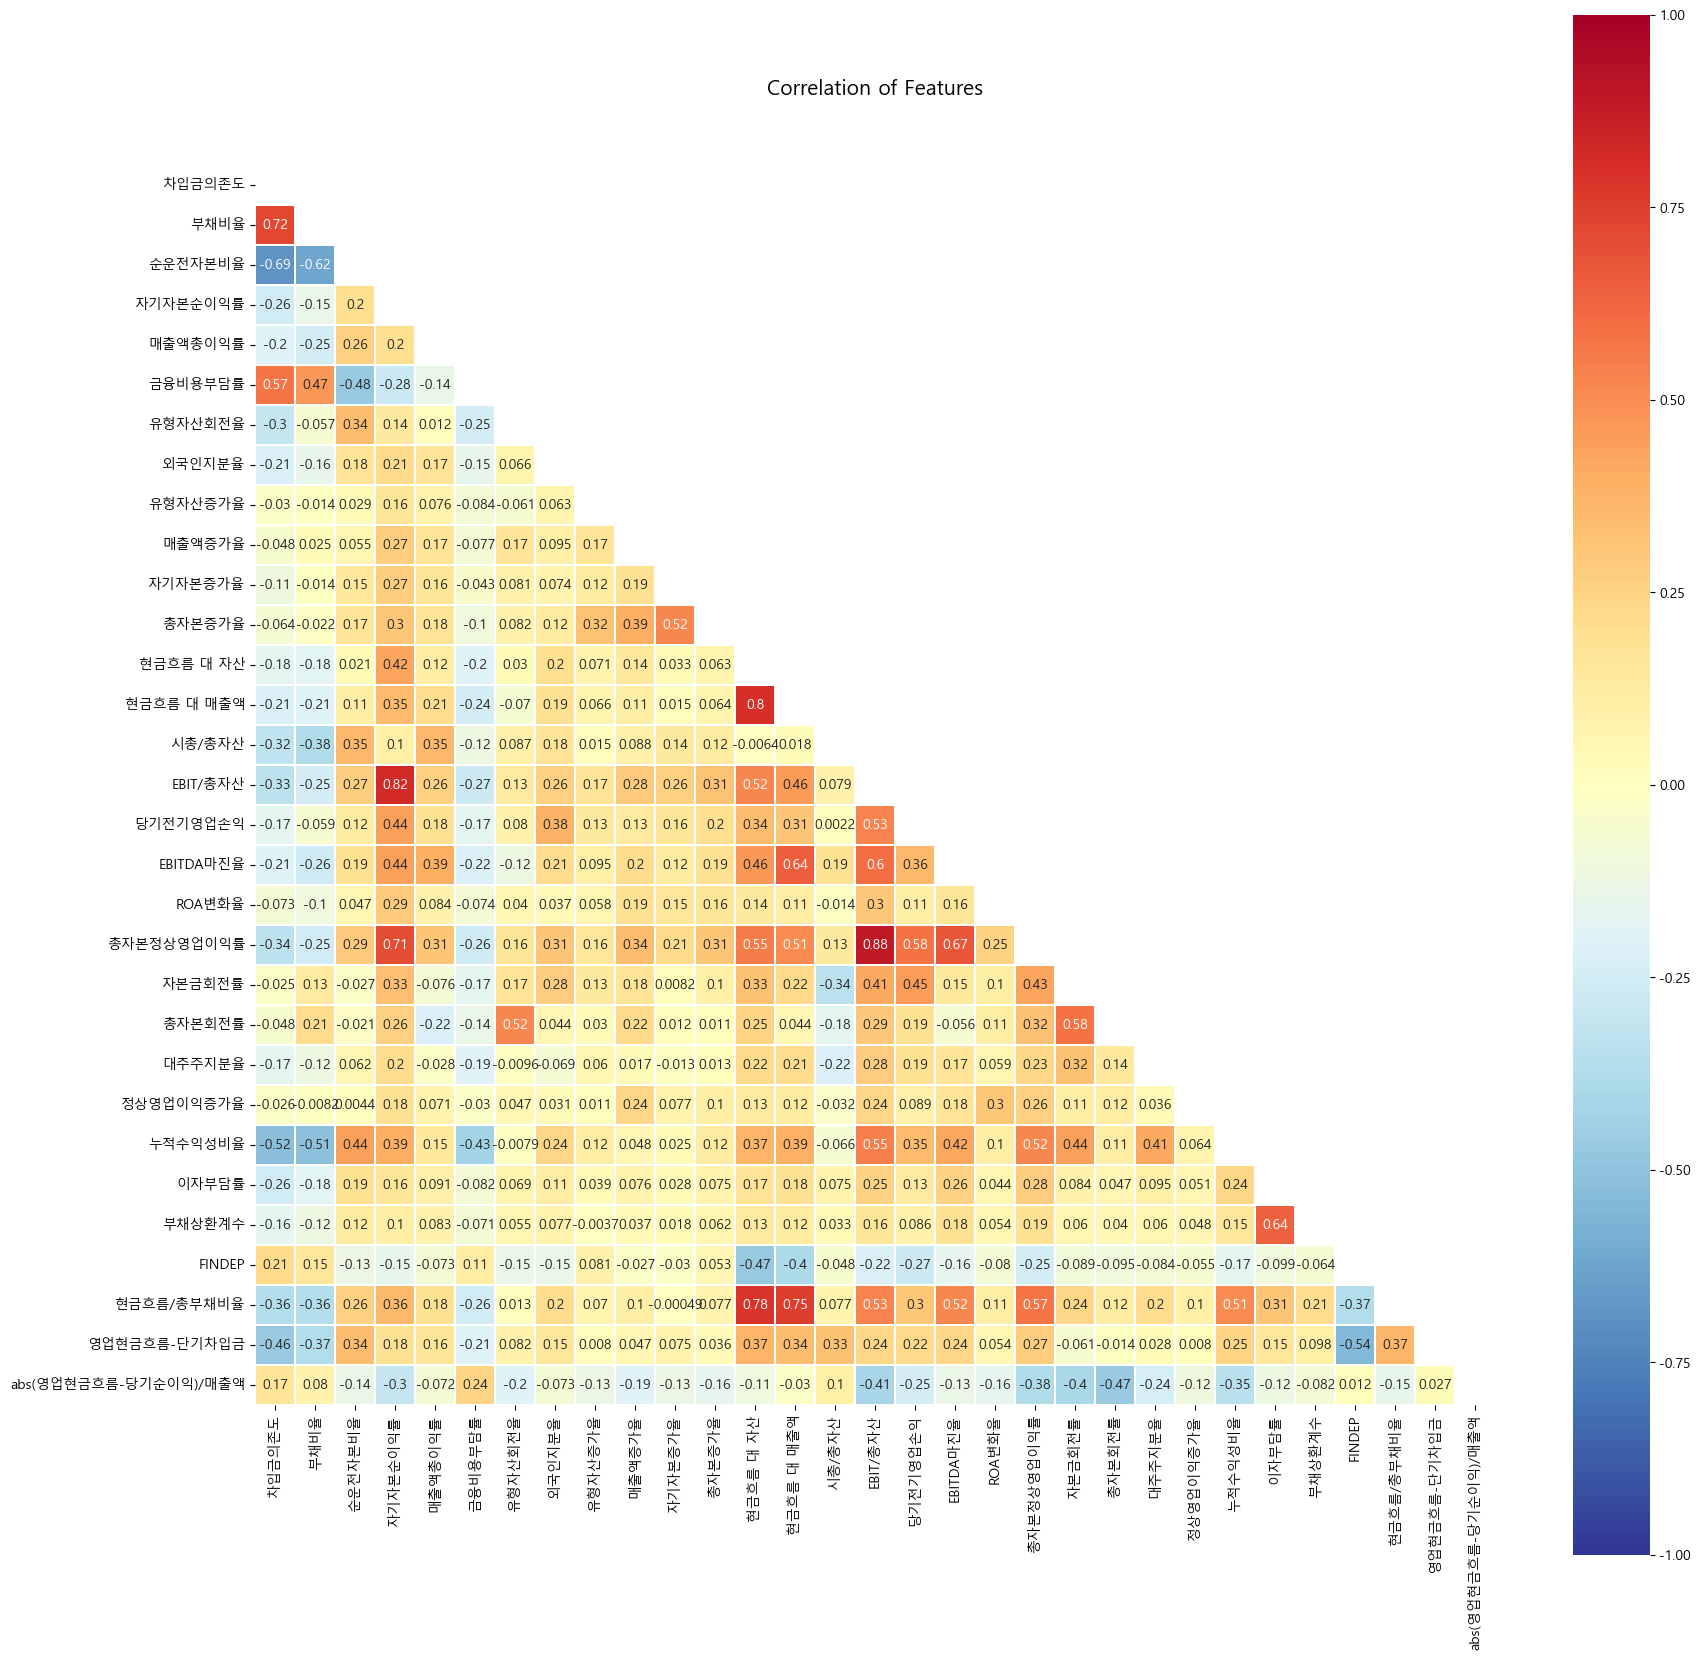

In [165]:
colormap = plt.cm.hot

corr = df_1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(20, 20))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family="Malgun Gothic")
plt.title("Correlation of Features", y=1.05, size=15)
sns.heatmap(corr,  linewidths=0.1, vmax=1.0, vmin=-1.0, square=True,mask=mask,
            cmap='RdYlBu_r', linecolor="white", annot=True, annot_kws={'size': 10})